# Simple Classification ( Iris Dataset )

The iris dataset is incuded in the sklearn library. It is sometimes called Fisher's Iris Dataset because Sir Ronald Fisher, a mid-20th-century statistician, used it as sample data in one of the first academic papers that dealt with classification.

We'll load the iris data, take a quick tabular look at a few rows and look at some graphs of the data.

In [50]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
iris =  datasets.load_iris()

### Iris data

In [52]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Creating a dataframe of the iris data

In [53]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [54]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
iris_df['target'] = iris.target

In [56]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [58]:
display(pd.concat([iris_df.head(3),iris_df.tail(3)]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [59]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [60]:
iris_df.shape

(150, 5)

In [61]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [62]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


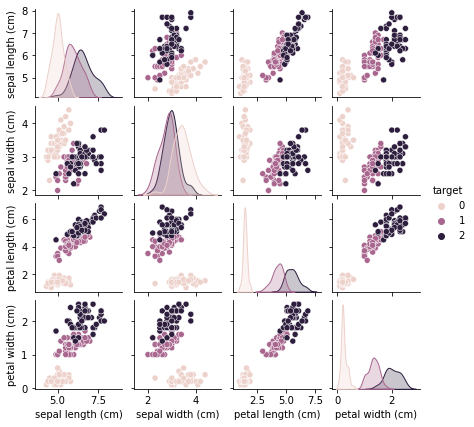

In [63]:
sns.pairplot(iris_df, hue ='target',size=1.5);

Along the diagonal we can see histograms of the frequency of the different types of iris differentiated by color. All the other entries are scatter plots of pairs of features.

In several of the plots, the pink group (target 0) seems to stand apart from the other two groups. Which species is this?

In [64]:
print('targets: {}'.format(iris.target_names),iris.target_names[0], sep="\n")

targets: ['setosa' 'versicolor' 'virginica']
setosa


So it looks like the species setosa is easy to seperate or partition off from the other species. The species versicolor and virginica are more intertwined.

## Splitting the data into training and testing data

In [65]:
# Simple train-test split
(iris_x_train, iris_x_test, iris_y_train, iris_y_test) = train_test_split(iris.data, iris.target, test_size=0.25)

In [66]:
print("Train feature shape : ",iris_x_train.shape)
print("Test feature shape : ",iris_x_test.shape)

Train feature shape :  (112, 4)
Test feature shape :  (38, 4)


So our training set has 112 samples described by 4 features and the testing data has 38 samples described by the same 4 attributes.

In [67]:
iris_x_train[0:5]


array([[5. , 3.3, 1.4, 0.2],
       [6.3, 2.3, 4.4, 1.3],
       [6.1, 2.9, 4.7, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [5.4, 3.7, 1.5, 0.2]])

In [68]:
iris_x_test[0:5]

array([[5.4, 3.9, 1.3, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [7.7, 3. , 6.1, 2.3],
       [7.7, 2.8, 6.7, 2. ]])

## 1. Simple Classifier : K Nearest Neighbors (KNN)

### 1.1 Training the model

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
fit1 = knn.fit(iris_x_train, iris_y_train)
predictions = fit.predict(iris_x_test)

### 1.2 Accuracy of the model

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score

print("Accuracy : ", accuracy_score(iris_y_test, predictions))


Accuracy :  0.7894736842105263


We are getting an accuracy of 97.36%

### 1.3 Confusion Matrix

In [71]:
print("Confusion Matrix : ", confusion_matrix(iris_y_test, predictions), sep="\n")

Confusion Matrix : 
[[ 4  5  2]
 [ 0 12  1]
 [ 0  0 14]]


## 2. Simple Classifier : Naive Bayes

### 2.1 Training the model

In [72]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
fit2 = nb.fit(iris_x_train, iris_y_train)
predictions2 = fit2.predict(iris_x_test)

### 2.2 Accuracy of the model

In [73]:
print("Accuracy : ", accuracy_score(iris_y_test, predictions2))

Accuracy :  0.9473684210526315


We are getting an accuracy of 94.73 %

### 2.3 Confusion Matrix

In [74]:
print("Confusion Matrix : ", confusion_matrix(iris_y_test, predictions2), sep="\n")

Confusion Matrix : 
[[11  0  0]
 [ 0 12  1]
 [ 0  1 13]]


## 3. Simple Evaluation of Classifiers

#### Learning Performance

In [75]:
iris = datasets.load_iris()

In [76]:
(iris_x_train, iris_x_test, iris_y_train, iris_y_test) = train_test_split(iris.data, iris.target, test_size=.90, random_state = 42)

models = { 'kNN': KNeighborsClassifier(n_neighbors = 3),
            'NB': GaussianNB()}

for name, model in models.items():
    fit = model.fit(iris_x_train, iris_y_train)
    predictions = fit.predict(iris_x_test)
    
    score = accuracy_score(iris_y_test, predictions)
    print("{:>3s} : {:0.2f}".format(name,score))

kNN : 0.96
 NB : 0.81


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


With a test set size of 90% of the data, k-NN does fairly well compared to NB, on this train-test split. 
From learning performance perspective, iris is a fairly easy problem. It is reasonably easy to distinguish the different types of flowers, based on the measurements we have, using very simple classifiers.